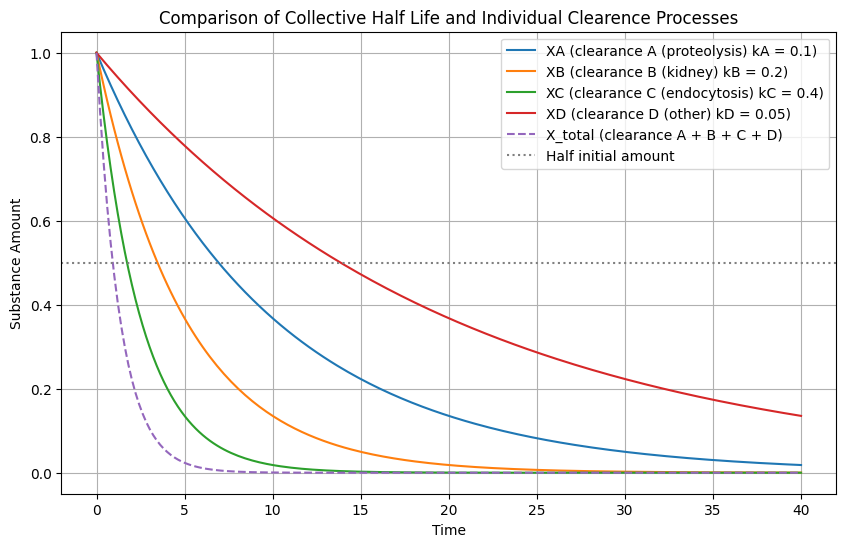

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
kA = 0.1   # Clearance rate A (proteolysis)
kB = 0.2   # Clearance rate B (kidney)
kC = 0.4   # Clearance rate C (endocytosis)
kD = 0.05  # Clearance rate D (other)

# ODE system
def clearance_system(t, y):
    XA, XB, XC, XD, X_total = y
    dXA_dt = -kA * XA
    dXB_dt = -kB * XB
    dXC_dt = -kC * XC
    dXD_dt = -kD * XD
    dX_total_dt = -(kA + kB + kC + kD) * X_total
    return [dXA_dt, dXB_dt, dXC_dt, dXD_dt, dX_total_dt]

# Initial conditions
XA_0 = 1.0
XB_0 = 1.0
XC_0 = 1.0
XD_0 = 1.0
X_total_0 = 1.0
y0 = [XA_0, XB_0, XC_0, XD_0, X_total_0]

# Time span
t_span = (0, 40)
t_eval = np.linspace(t_span[0], t_span[1], 200)

# Solve the ODE system
solution = solve_ivp(clearance_system, t_span, y0, t_eval=t_eval)

# Extract solutions
t = solution.t
XA = solution.y[0]
XB = solution.y[1]
XC = solution.y[2]
XD = solution.y[3]
X_total = solution.y[4]

# Plot
plt.figure(figsize=(10,6))
plt.plot(t, XA, label='XA (clearance A (proteolysis) kA = 0.1)', linestyle='-')
plt.plot(t, XB, label='XB (clearance B (kidney) kB = 0.2)', linestyle='-')
plt.plot(t, XC, label='XC (clearance C (endocytosis) kC = 0.4)', linestyle='-')
plt.plot(t, XD, label='XD (clearance D (other) kD = 0.05)', linestyle='-')
plt.plot(t, X_total, label='X_total (clearance A + B + C + D)', linestyle='--')
plt.axhline(0.5, color='gray', linestyle='dotted', label='Half initial amount')
plt.xlabel('Time')
plt.ylabel('Substance Amount')
plt.title('Comparison of Collective Half Life and Individual Clearence Processes')
plt.legend()
plt.grid(True)
plt.show()
